In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import json
%matplotlib inline
import math
import time
import datetime

import tensorflow as tf
import keras

Using TensorFlow backend.


In [3]:
from pandas import datetime
from pandas_datareader import data

stock = 'AAPL'
start = datetime(2016,3,19)
end = datetime(2018,3,19)

df = data.DataReader(stock, 'iex', start, end)
df.head()

5y


,open,high,low,close,volume
date,,,,,
2016-03-21,102.1213,103.7794,101.3598,102.1020,35502678
2016-03-22,101.4657,103.4324,101.4272,102.8829,32444375
2016-03-23,102.6515,103.2203,102.0924,102.3141,25703495
2016-03-24,101.6778,102.4298,101.1187,101.8706,26132955
2016-03-28,102.1888,102.3719,101.2826,101.4079,19411372


D:\python_Anaconda3\envs\tf-gpu\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


,close,volume,macd,rsi_12,volume_delta,MA 20,MA 50,Daily Change,Fluctuation
date,,,,,,,,,
2017-01-03,113.8474,28781865,1.277287,52.196938,-1804400.0,112.612895,110.465704,0.3430,1.368094
2017-01-04,113.7200,21118116,1.188925,49.671961,-7663749.0,112.951545,110.466010,0.1666,0.656558
2017-01-05,114.2983,22193587,1.152279,60.167694,1075471.0,113.277945,110.457402,0.6763,0.910283
2017-01-06,115.5725,31751900,1.212082,74.324962,9558313.0,113.615125,110.462576,1.1076,1.451020
2017-01-09,116.6311,33561948,1.329570,81.042392,1810048.0,113.951815,110.540802,1.0193,1.263300


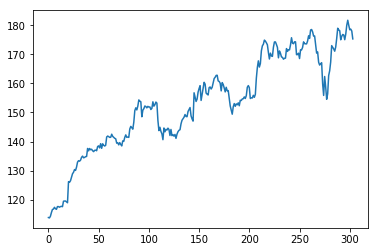

In [4]:
from stockstats import StockDataFrame
df = StockDataFrame.retype(df)
y = df['close']

#generate features with stockstats package
df['macd'] = df.get('macd')
df['rsi_12'] = df.get('rsi_6')
df['volume_delta'] = df.get('volume_delta')
df['MA 20'] = y.rolling(20).mean()
df['MA 50'] = y.rolling(50).mean()
df['Daily Change'] = df['close']-df['open']
df['Fluctuation'] = ((df['high']-df['low'])/df['low'])*100
df.tail(10)
df = pd.DataFrame(df)

X = df.drop(['open', 'high', 'low', 'macdh', 'macds', 'close_-1_s', 'close_-1_d', 'rs_6', 'rsi_6', 'close_12_ema', 'close_26_ema'], axis=1)
X_shape = X.shape[0]
X1 = X['20160103':'20180319']
y = X1['close']
y_max = np.max(np.array(y))
y_min = np.min(np.array(y))
plt.plot(np.array(y))
X1.head()

In [5]:
from sklearn.preprocessing import MinMaxScaler

def normalize_df(df):
    normalize_data = MinMaxScaler()
    for i in range(0,df.shape[1]):
        df.iloc[:,i] = normalize_data.fit_transform(df.iloc[:,i].values.reshape(-1,1))
    return df


In [6]:
X2 = normalize_df(X1)
y_normal = X2['close']


X3 = X2.drop(['close'], axis = 1)
X3.tail(10)


D:\python_Anaconda3\envs\tf-gpu\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
D:\python_Anaconda3\envs\tf-gpu\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
D:\python_Anaconda3\envs\tf-gpu\lib\site-packages\pandas\core\indexing.py:621: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value


,volume,macd,rsi_12,volume_delta,MA 20,MA 50,Daily Change,Fluctuation
date,,,,,,,,
2018-03-06,0.099653,0.725616,0.619796,0.522207,0.897092,0.976736,0.342433,0.130144
2018-03-07,0.180452,0.709808,0.489263,0.611019,0.906962,0.976972,0.435405,0.079564
2018-03-08,0.099506,0.711144,0.604323,0.498695,0.921030,0.977823,0.531174,0.124576
2018-03-09,0.185369,0.735690,0.730379,0.614536,0.940876,0.981080,0.570320,0.175727
2018-03-12,0.185593,0.766874,0.782677,0.555064,0.960605,0.984889,0.529077,0.131173
2018-03-13,0.180351,0.772664,0.639817,0.551268,0.974059,0.987979,0.245965,0.329905
2018-03-14,0.156614,0.760396,0.532662,0.538425,0.985049,0.991169,0.297694,0.184713
2018-03-15,0.088988,0.749200,0.544918,0.507945,0.993842,0.993455,0.439599,0.132683
2018-03-16,0.259069,0.731690,0.495103,0.673021,0.997763,0.995547,0.385074,0.068982


In [7]:
window = 10 #prediction time-lag window

def load_data(stock,y,window):
    raw_data = stock.as_matrix()
    length = raw_data.shape[0]
    indicators = raw_data.shape[1]    
    prices = y.as_matrix()
    data = []

    for index in range(len(raw_data)-(window)+1):
        data.append(raw_data[index:index+window])
    
    data = np.array(data)
    valid_size = int(np.round(1/100*data.shape[0]))
    test_size = int(1)
    training_size = data.shape[0] - (valid_size + test_size)
    
    X_train = data[:training_size+valid_size,:-1]
    y_train = prices[window-1:training_size+window+valid_size-1]
    
    #no need
    #X_valid = data[training_size:training_size+valid_size,:-1]
    #y_valid = prices[training_size+window-1:training_size+valid_size+window-1]
    
    X_valid = data[training_size+valid_size:,:-1]
    y_valid = prices[-1]
    
    raw_data = raw_data.reshape(1,length,indicators)
    
    X_test = np.zeros((1,window,8))
    for i in range(0,window-1):
        X_test[0,window-1-i,:] = raw_data[0,length-i-1,:]
    X_test = X_test[:,1:,:]
    y_test = 0
    
    return [X_train, y_train, X_valid, y_valid, X_test, y_test]

In [8]:
X_train, y_train, X_valid, y_valid, X_test, y_test = load_data(X3,y_normal,window+1)
print(X_test.shape)
print(X_test)
print(y_test)

(1, 10, 8)
[[[ 0.09965288  0.72561585  0.61979555  0.52220658  0.89709181  0.97673627
    0.34243253  0.13014397]
  [ 0.18045206  0.70980775  0.48926335  0.61101938  0.90696178  0.97697184
    0.43540506  0.07956419]
  [ 0.09950588  0.71114431  0.60432252  0.49869512  0.92102991  0.97782318
    0.53117376  0.12457605]
  [ 0.18536945  0.73568981  0.73037875  0.61453635  0.94087578  0.98108023
    0.57032009  0.17572749]
  [ 0.18559321  0.7668744   0.78267664  0.55506368  0.96060464  0.98488859
    0.52907664  0.13117311]
  [ 0.18035066  0.7726635   0.63981667  0.55126759  0.97405861  0.98797867
    0.24596478  0.32990465]
  [ 0.15661432  0.76039623  0.53266204  0.53842456  0.98504941  0.99116946
    0.29769386  0.18471287]
  [ 0.08898806  0.74919954  0.544918    0.50794515  0.99384204  0.99345506
    0.43959931  0.1326828 ]
  [ 0.2590694   0.73169042  0.49510275  0.67302148  0.99776287  0.9955472
    0.38507406  0.06898228]
  [ 0.19824849  0.69132485  0.32556818  0.51267114  1.         

In [9]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers.recurrent import LSTM
from keras.models import load_model

def build_model(layers,neurons,d):
    #d = 0.3
    model = Sequential()
    
    model.add(LSTM(neurons[0], input_shape=(layers[1], layers[0]), return_sequences=True))
    model.add(Dropout(d))
        
    model.add(LSTM(neurons[1], input_shape=(layers[1], layers[0]), return_sequences=False))
    model.add(Dropout(d))
        
    model.add(Dense(neurons[2],kernel_initializer="uniform",activation='relu'))        
    model.add(Dense(neurons[3],kernel_initializer="uniform",activation='linear'))
    
        
    start = time.time()
    model.compile(loss='mse',optimizer='adam', metrics=['accuracy'])
    print("Compilation Time : ", time.time() - start)
    return model

model = build_model([X3.shape[1],window,1],[256,256,32,1],0.3)

Compilation Time :  0.02105879783630371


In [10]:
model.fit(X_train,y_train,batch_size=512,epochs=90,validation_split=0.1,verbose=1)

Train on 263 samples, validate on 30 samples
Epoch 1/90
263/263 [==============================] - 4s 13ms/step - loss: 0.3666 - acc: 0.0000e+00 - val_loss: 0.7180 - val_acc: 0.0000e+00
Epoch 2/90
263/263 [==============================] - 0s 141us/step - loss: 0.3543 - acc: 0.0000e+00 - val_loss: 0.6921 - val_acc: 0.0000e+00
Epoch 3/90
263/263 [==============================] - 0s 133us/step - loss: 0.3384 - acc: 0.0000e+00 - val_loss: 0.6524 - val_acc: 0.0000e+00
Epoch 4/90
263/263 [==============================] - 0s 133us/step - loss: 0.3147 - acc: 0.0000e+00 - val_loss: 0.5880 - val_acc: 0.0000e+00
Epoch 5/90
263/263 [==============================] - 0s 135us/step - loss: 0.2761 - acc: 0.0000e+00 - val_loss: 0.4858 - val_acc: 0.0000e+00
Epoch 6/90
263/263 [==============================] - 0s 135us/step - loss: 0.2168 - acc: 0.0000e+00 - val_loss: 0.3363 - val_acc: 0.0000e+00
Epoch 7/90
263/263 [==============================] - 0s 133us/step - loss: 0.1342 - acc: 0.0000e+00 - v

Epoch 60/90
263/263 [==============================] - 0s 137us/step - loss: 0.0070 - acc: 0.0000e+00 - val_loss: 0.0162 - val_acc: 0.0333
Epoch 61/90
263/263 [==============================] - 0s 122us/step - loss: 0.0062 - acc: 0.0000e+00 - val_loss: 0.0168 - val_acc: 0.0333
Epoch 62/90
263/263 [==============================] - 0s 130us/step - loss: 0.0051 - acc: 0.0000e+00 - val_loss: 0.0172 - val_acc: 0.0333
Epoch 63/90
263/263 [==============================] - 0s 126us/step - loss: 0.0053 - acc: 0.0000e+00 - val_loss: 0.0168 - val_acc: 0.0333
Epoch 64/90
263/263 [==============================] - 0s 120us/step - loss: 0.0061 - acc: 0.0000e+00 - val_loss: 0.0179 - val_acc: 0.0333
Epoch 65/90
263/263 [==============================] - 0s 122us/step - loss: 0.0052 - acc: 0.0000e+00 - val_loss: 0.0188 - val_acc: 0.0333
Epoch 66/90
263/263 [==============================] - 0s 133us/step - loss: 0.0053 - acc: 0.0000e+00 - val_loss: 0.0174 - val_acc: 0.0333
Epoch 67/90
263/263 [======

In [11]:
y_validation = model.predict(X_valid)

y_validation_scaled = y_validation*(y_max-y_min)+y_min
y_valid_scaled = y[-1]*(y_max-y_min)+y_min

RMSE = ((y_validation_scaled-y_valid_scaled)**(2))**(0.5)

print(y_validation_scaled)
print(y_valid_scaled)
print(RMSE)

[[ 176.29493713]]
175.3
[[ 0.99493408]]


In [12]:
y_predict = model.predict(X_test)
y_predict_scaled = y_predict*(y_max-y_min)+y_min
print(y_predict_scaled)

[[ 176.52059937]]


In [13]:
#Decision based on prediction
y_check = y[-1]*(y_max-y_min)+y_min

print(y_check)
if y_check < y_predict_scaled:
    print('Buy')
elif y_check > y_predict_scaled:
    print('Sell if bought')
else:
    print('error')

175.3
Buy


In [14]:
#predict 5 days ahead of time

#adjust stock price
y_normal1 = y_normal[5:]
y_normal1.shape
y_normal1 = np.array(y_normal1)
y_normal2 = pd.DataFrame(np.append(y_normal1,[0,0,0,0,0]))
y_normal2.head(10)

,0
0,0.044541
1,0.053766
2,0.046559
3,0.043531
4,0.057369
5,0.057225
6,0.054199
7,0.057369
8,0.058522
9,0.056937


In [15]:
def load_data(stock,y,window):
    raw_data = stock.as_matrix()
    length = raw_data.shape[0]
    indicators = raw_data.shape[1]    
    prices = y.as_matrix()
    data = []

    for index in range(len(raw_data)-(window)+1):
        data.append(raw_data[index:index+window])
    
    data = np.array(data)
    valid_size = int(np.round(1/100*data.shape[0]))
    test_size = int(1)
    training_size = data.shape[0] - (4 + test_size)
    
    X_train = data[:training_size,:-1]
    y_train = prices[window-1:training_size+window-1]
    
    #no need
    #X_valid = data[training_size:training_size+valid_size,:-1]
    #y_valid = prices[training_size+window-1:training_size+valid_size+window-1]
    
    X_valid = data[training_size+valid_size:,:-1]
    y_valid = prices[-1]
    
    raw_data = raw_data.reshape(1,length,indicators)
    
    X_test = np.zeros((1,window,8))
    for i in range(0,window-1):
        X_test[0,window-1-i,:] = raw_data[0,length-i-1,:]
    X_test = X_test[:,1:,:]
    y_test = 0
    
    return [X_train, y_train, X_valid, y_valid, X_test, y_test]



X_train, y_train, X_valid, y_valid, X_test, y_test = load_data(X3,y_normal2,window+1)

In [16]:
model.fit(X_train,y_train,batch_size=512,epochs=100,validation_split=0.1,verbose=1)

Train on 260 samples, validate on 29 samples
Epoch 1/100
260/260 [==============================] - 0s 471us/step - loss: 0.0066 - acc: 0.0000e+00 - val_loss: 0.0209 - val_acc: 0.0345
Epoch 2/100
260/260 [==============================] - 0s 208us/step - loss: 0.0069 - acc: 0.0000e+00 - val_loss: 0.0195 - val_acc: 0.0345
Epoch 3/100
260/260 [==============================] - 0s 143us/step - loss: 0.0063 - acc: 0.0000e+00 - val_loss: 0.0197 - val_acc: 0.0345
Epoch 4/100
260/260 [==============================] - 0s 139us/step - loss: 0.0068 - acc: 0.0000e+00 - val_loss: 0.0221 - val_acc: 0.0345
Epoch 5/100
260/260 [==============================] - 0s 150us/step - loss: 0.0070 - acc: 0.0000e+00 - val_loss: 0.0241 - val_acc: 0.0345
Epoch 6/100
260/260 [==============================] - 0s 141us/step - loss: 0.0065 - acc: 0.0000e+00 - val_loss: 0.0221 - val_acc: 0.0345
Epoch 7/100
260/260 [==============================] - 0s 139us/step - loss: 0.0060 - acc: 0.0000e+00 - val_loss: 0.0205 

Epoch 60/100
260/260 [==============================] - 0s 127us/step - loss: 0.0057 - acc: 0.0000e+00 - val_loss: 0.0141 - val_acc: 0.0345
Epoch 61/100
260/260 [==============================] - 0s 123us/step - loss: 0.0054 - acc: 0.0000e+00 - val_loss: 0.0142 - val_acc: 0.0345
Epoch 62/100
260/260 [==============================] - 0s 123us/step - loss: 0.0057 - acc: 0.0000e+00 - val_loss: 0.0142 - val_acc: 0.0345
Epoch 63/100
260/260 [==============================] - 0s 123us/step - loss: 0.0057 - acc: 0.0000e+00 - val_loss: 0.0145 - val_acc: 0.0345
Epoch 64/100
260/260 [==============================] - 0s 125us/step - loss: 0.0054 - acc: 0.0000e+00 - val_loss: 0.0137 - val_acc: 0.0345
Epoch 65/100
260/260 [==============================] - 0s 120us/step - loss: 0.0058 - acc: 0.0000e+00 - val_loss: 0.0139 - val_acc: 0.0345
Epoch 66/100
260/260 [==============================] - 0s 123us/step - loss: 0.0055 - acc: 0.0000e+00 - val_loss: 0.0141 - val_acc: 0.0345
Epoch 67/100
260/260

In [17]:
y_predict = model.predict(X_test)
y_predict_scaled = y_predict*(y_max-y_min)+y_min
print(y_predict_scaled)

#Decision based on prediction
y_check = y[-1]*(y_max-y_min)+y_min

print(y_check)
if y_check < y_predict_scaled:
    print('Buy')
elif y_check > y_predict_scaled:
    print('Sell if bought')
else:
    print('error')

[[ 173.82354736]]
175.3
Sell if bought
